In [1]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 제거
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# 한글 폰트 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#### 음식물쓰레기 배출 데이터
- em_g(배출량) : 예측변수

In [3]:
# 음식물배출량쓰레기 데이터 불러오기
food = pd.read_csv("FOOD_WASTE_210811_update.csv", encoding = "cp949")
food.tail()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661
2211444,2021-06-30,제주시,50110640,오라동,W6XAD5,2,2900,87


In [4]:
# 년과 월 분리

# year 
em_cnt_Y = food["base_date"]

c1_list = []
for i in em_cnt_Y:
    i = str(i)  # 숫자 -> 문자로 변환
    i = i[0:4]  # year 부분만 추출
    i = int(i)
    c1_list.append(i)  # list 로 저장 

    
# Month
em_cnt_M = food["base_date"]

c2_list = []
for i in em_cnt_M:
    i = str(i)  # 숫자 -> 문자로 변환
    i = i[5:7]  # month 부분만 추출
    i = int(i)  # 01 -> 1로 바꾸기 위해 int로 변경
    c2_list.append(i)  # list 로 저장 

In [5]:
# 새 변수 추가
food.insert(1,"base_date_year",c1_list)
food.insert(2,"base_date_month",c2_list)

food.head(2)

,base_date,base_date_year,base_date_month,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,2018,1,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,2018,1,제주시,50110630,아라동,W6XA97,25,59800,1787


#### 요일 변수 추가

In [6]:
food["base_date"] = pd.to_datetime(food["base_date"])  # 데이터타임으로 변경
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211445 entries, 0 to 2211444
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   base_date        datetime64[ns]
 1   base_date_year   int64         
 2   base_date_month  int64         
 3   city             object        
 4   emd_cd           object        
 5   emd_nm           object        
 6   em_area_cd       object        
 7   em_cnt           int64         
 8   em_g             int64         
 9   pay_amt          int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 168.7+ MB


In [7]:
food["day-of-week"] = food["base_date"].dt.day_name()  # 요일변수 추가
food.tail(3)

,base_date,base_date_year,base_date_month,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,day-of-week
2211442,2021-06-30,2021,6,제주시,50110250,한림읍,W6XEB8,21,48300,1444,Wednesday
2211443,2021-06-30,2021,6,제주시,50110250,한림읍,W6XEA2,5,22050,661,Wednesday
2211444,2021-06-30,2021,6,제주시,50110640,오라동,W6XAD5,2,2900,87,Wednesday


In [8]:
food["day-of-week"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [9]:
# 값 이름 변경
food['day-of-week'] = food['day-of-week'].replace(["Monday"],"월")
food['day-of-week'] = food['day-of-week'].replace(["Tuesday"],"화")
food['day-of-week'] = food['day-of-week'].replace(["Wednesday"],"수")
food['day-of-week'] = food['day-of-week'].replace(["Thursday"],"목")
food['day-of-week'] = food['day-of-week'].replace(["Friday"],"금")
food['day-of-week'] = food['day-of-week'].replace(["Saturday"],"토")
food['day-of-week'] = food['day-of-week'].replace(["Sunday"],"일")

food.head(3)

,base_date,base_date_year,base_date_month,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,day-of-week
0,2018-01-01,2018,1,제주시,50110670,외도동,W6X062,2,15500,464,월
1,2018-01-01,2018,1,제주시,50110630,아라동,W6XA97,25,59800,1787,월
2,2018-01-01,2018,1,제주시,50110630,아라동,W6XA96,8,25350,758,월


In [10]:
# 요일별로 그룹화
base_date_week = food.groupby('day-of-week')['em_g'].sum()

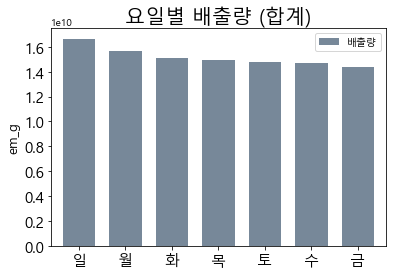

In [11]:
# Bar Chart로 요일별 총 배출건수 확인
base_date_week.sort_values(ascending = False).plot(kind = "bar", figsize = (6,4), fontsize = 15, width=0.7, color="lightslategrey")

plt.xlabel('', fontsize = 13)
plt.xticks(rotation = 0)
plt.ylabel('em_g', fontsize = 13)
plt.legend(["배출량"])
plt.title("요일별 배출량 (합계)", fontsize = 20)
plt.show()

In [12]:
# 2018년만 추출 후 요일별 배출량 확인
food_2018 = food[food["base_date_year"] == 2018]
food_2019 = food[food["base_date_year"] == 2019]
food_2020 = food[food["base_date_year"] == 2020]
food_2021 = food[food["base_date_year"] == 2021]

food_2018.head(3)

,base_date,base_date_year,base_date_month,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,day-of-week
0,2018-01-01,2018,1,제주시,50110670,외도동,W6X062,2,15500,464,월
1,2018-01-01,2018,1,제주시,50110630,아라동,W6XA97,25,59800,1787,월
2,2018-01-01,2018,1,제주시,50110630,아라동,W6XA96,8,25350,758,월


In [13]:
# 그래프 순서 지정
food_2018['day-of-week'] = pd.Categorical(food_2018['day-of-week'], categories=['일', '월', '화', '수', '목','금','토'], ordered=True)
food_2019['day-of-week'] = pd.Categorical(food_2019['day-of-week'], categories=['일', '월', '화', '수', '목','금','토'], ordered=True)
food_2020['day-of-week'] = pd.Categorical(food_2020['day-of-week'], categories=['일', '월', '화', '수', '목','금','토'], ordered=True)
food_2021['day-of-week'] = pd.Categorical(food_2021['day-of-week'], categories=['일', '월', '화', '수', '목','금','토'], ordered=True)

food_2021.head(2)

,base_date,base_date_year,base_date_month,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,day-of-week
1845737,2021-01-01,2021,1,제주시,50110670,외도동,W6X706,12,32900,984,금
1845738,2021-01-01,2021,1,제주시,50110670,외도동,W6X705,23,45550,1362,금


In [14]:
# 각 년도별로 배출량 그룹화
food_2018_sum = food_2018.groupby('day-of-week')['em_g'].sum()
food_2019_sum = food_2019.groupby('day-of-week')['em_g'].sum()
food_2020_sum = food_2020.groupby('day-of-week')['em_g'].sum()
food_2021_sum = food_2021.groupby('day-of-week')['em_g'].sum()

food_2021_sum.index

CategoricalIndex(['일', '월', '화', '수', '목', '금', '토'], categories=['일', '월', '화', '수', '목', '금', '토'], ordered=True, dtype='category', name='day-of-week')

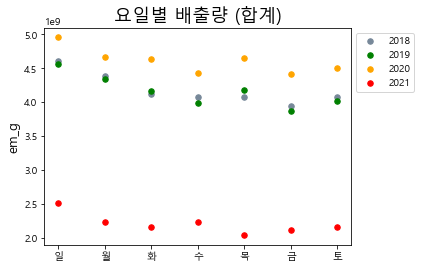

In [15]:
# scatter 그리기
plt.figure(figsize=(5.5,4))  # size 지정

plt.scatter(food_2018_sum.index, food_2018_sum, color='lightslategrey', s = 30, marker = "o")  # s = 30 : 크기, marker = "o" : 모양(o)
plt.scatter(food_2019_sum.index, food_2019_sum, color='green', s = 30, marker = "o")
plt.scatter(food_2020_sum.index, food_2020_sum, color='orange', s = 30, marker = "o")
plt.scatter(food_2021_sum.index, food_2021_sum, color='red', s = 30, marker = "o")

plt.ylabel('em_g', fontsize = 13)
plt.legend(["2018","2019","2020","2021"], bbox_to_anchor = (1,1))
plt.title("요일별 배출량 (합계)", fontsize = 18)
plt.show()

In [16]:
base_date_year = food.groupby('base_date_year')['em_g'].sum()
base_date_month = food.groupby('base_date_month')['em_g'].sum()

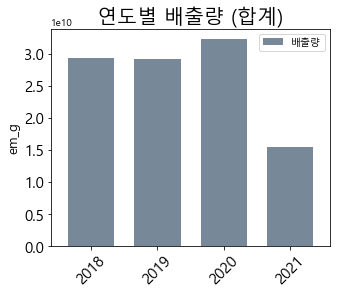

In [17]:
# Bar Chart로 년 별 총 배출건수 확인
base_date_year.plot(kind = "bar", figsize = (5,4), fontsize = 15, width=0.7, color="lightslategrey")

plt.xlabel('', fontsize = 13)
plt.xticks(rotation = 45)
plt.ylabel('em_g', fontsize = 13)
plt.legend(["배출량"])
plt.title("연도별 배출량 (합계)", fontsize = 20)
plt.show()

#### 월별 배출량 확인

In [18]:
# 년-월만 추출
em_cnt_M = food["base_date"]

c3_list = []
for i in em_cnt_M:
    i = str(i)  # 숫자 -> 문자로 변환
    i = i[0:7]  # month 부분만 추출
    c3_list.append(i)  # list 로 저장 

food.insert(1,"base_date_ym",c3_list)  # 변수 삽입

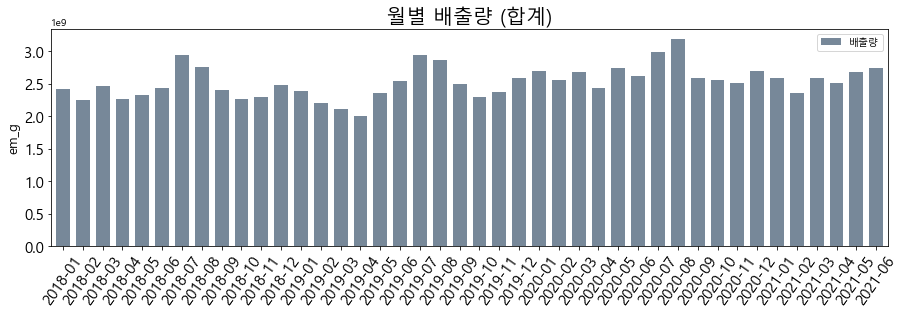

In [19]:
# 월별 배출량 그래프
food.groupby('base_date_ym')['em_g'].sum().plot(kind = "bar", figsize = (15,4), fontsize = 15, width=0.7, color="lightslategrey")

plt.xlabel('', fontsize = 13)
plt.xticks(rotation = 55)
plt.ylabel('em_g', fontsize = 13)
plt.legend(["배출량"])
plt.title("월별 배출량 (합계)", fontsize = 20)
plt.show()

#### 지역별 배출량

In [20]:
# 배출량 지역별로 그룹화
em_g = food.groupby('emd_nm')['em_g'].sum()

In [21]:
# 데이터프레임에 저장
FOOD_DF = pd.DataFrame()
FOOD_DF["em_g_sum"] = em_g
FOOD_DF.head(3)

,em_g_sum
emd_nm,
건입동,1806250850
구좌읍,538528350
남원읍,2212342000


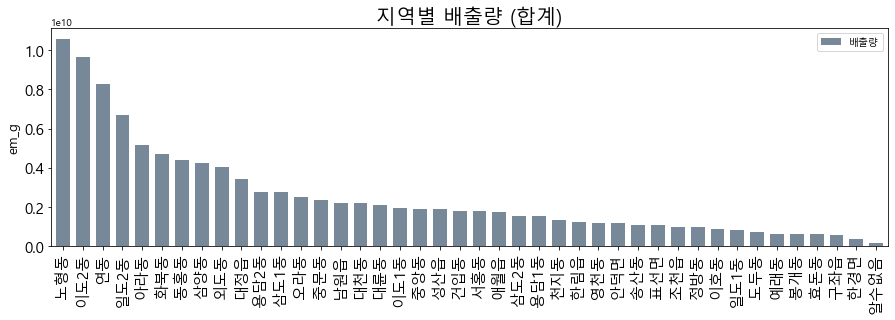

In [22]:
# Bar Chart로 총 배출량 확인
em_g.sort_values(ascending = False).plot(kind = "bar", figsize = (15,4), fontsize = 15, width=0.7, color="lightslategrey")

plt.xlabel('', fontsize = 13)
plt.xticks(rotation = 90)
plt.ylabel('em_g', fontsize = 13)
plt.legend(["배출량"])
plt.title("지역별 배출량 (합계)", fontsize = 20)
plt.show()

#### 날짜별 지역별 배출량

In [23]:
# 날짜별 지역별 배출량 groupby()
a = food.groupby(["base_date_ym","emd_nm"])["em_g"].sum()
a = pd.DataFrame(a)
a = a.reset_index()
a.head(2)

,base_date_ym,emd_nm,em_g
0,2018-01,건입동,45646550
1,2018-01,남원읍,42437700


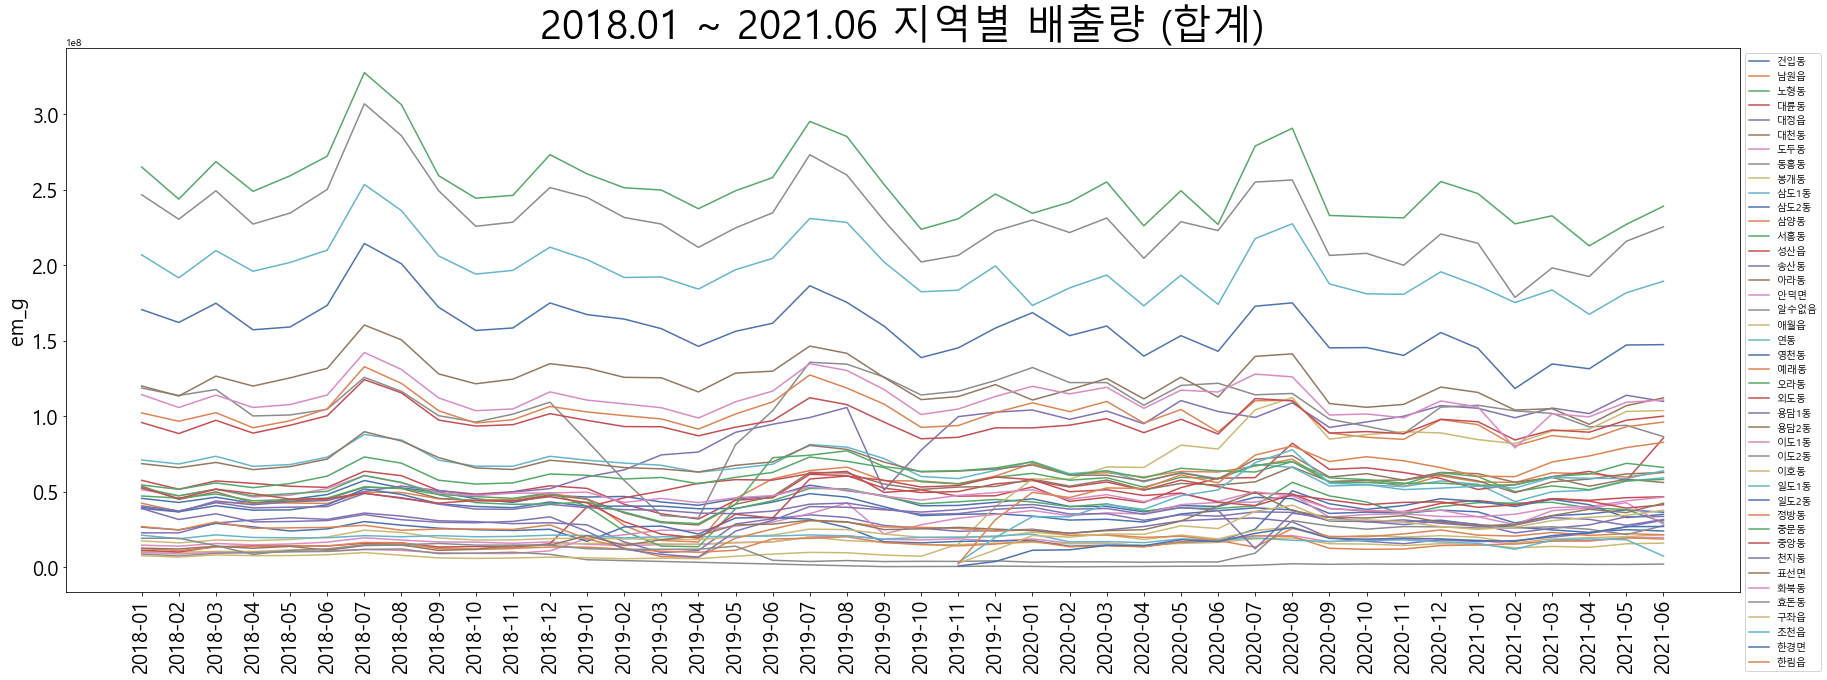

In [24]:
# sns 사용하여 선 그래프 그리기
palette1 = sns.color_palette("deep", 42)  # COLOR 지정

g = sns.lineplot(x = "base_date_ym", y= "em_g", hue = "emd_nm",data = a,palette = palette1)  

g.figure.set_figwidth(30)   # 그래프 크기
g.figure.set_figheight(10)  # 그래프 크기

plt.xticks(rotation = 90, fontsize = 20)  # x축 눈금
plt.yticks(fontsize = 20)  # y축 눈금

g.set_xlabel("", fontsize = 20)  # X축 레이블
g.set_ylabel("em_g", fontsize = 20)  # Y축 레이블
g.set_title("2018.01 ~ 2021.06 지역별 배출량 (합계)", fontsize = 40)  # 제목

plt.legend(bbox_to_anchor = (1,1))  # 범례 위치
plt.show()

#### 예측한 7,8월 추가해서 분포 확인

In [25]:
# 7,8월 예측한 데이터 불러오기
food_predict = pd.read_csv("7_8월_배출량_예측결과.csv", encoding = "cp949")
food_predict.tail()

,NO,행정동명,7월 배출량(g),8월 배출량(g)
37,38,대륜동,46746743.5,47563612.8
38,39,대천동,56916306.4,60201412.1
39,40,중문동,66140250.0,66140250.0
40,41,예래동,20158222.7,20543959.2
41,42,알수없음,2244207.2,2244207.2


In [26]:
# 2021-07 변수만 추출해서 새 변수 추가
food_month_7 = food_predict[["행정동명","7월 배출량(g)"]]
food_month_7["base_date_ym"] = "2021-07"
food_month_7 = food_month_7.rename(columns={"7월 배출량(g)":'em_g'})  # 변수명 이름 변경
food_month_7 = food_month_7.rename(columns={"행정동명":'emd_nm'})  # 변수명 이름 변경

food_month_7.head(4)

,emd_nm,em_g,base_date_ym
0,한림읍,86982118.4,2021-07
1,애월읍,106098161.0,2021-07
2,구좌읍,39653823.7,2021-07
3,조천읍,63927750.0,2021-07


In [27]:
# 2021-08 변수만 추출해서 새 변수 추가
food_month_8 = food_predict[["행정동명","8월 배출량(g)"]]
food_month_8["base_date_ym"] = "8월 배출량(g)"
food_month_8 = food_month_8.rename(columns={"8월 배출량(g)":'em_g'})  # 변수명 이름 변경
food_month_8 = food_month_8.rename(columns={"행정동명":'emd_nm'})  # 변수명 이름 변경

food_month_8.head(4)

,emd_nm,em_g,base_date_ym
0,한림읍,91217246.8,8월 배출량(g)
1,애월읍,108439922.0,8월 배출량(g)
2,구좌읍,41500497.4,8월 배출량(g)
3,조천읍,63927750.0,8월 배출량(g)


In [28]:
# 7월 8월 행 기준으로 변환
food_month_78 = pd.concat([food_month_7,food_month_8])
food_month_78.tail(3)

,emd_nm,em_g,base_date_ym
39,중문동,66140250.0,8월 배출량(g)
40,예래동,20543959.2,8월 배출량(g)
41,알수없음,2244207.2,8월 배출량(g)


In [29]:
# food 데이터에 7,8월 변수 병합
food_ = pd.concat([a,food_month_78])
food_.tail(4)

,base_date_ym,emd_nm,em_g
38,8월 배출량(g),대천동,60201412.1
39,8월 배출량(g),중문동,66140250.0
40,8월 배출량(g),예래동,20543959.2
41,8월 배출량(g),알수없음,2244207.2


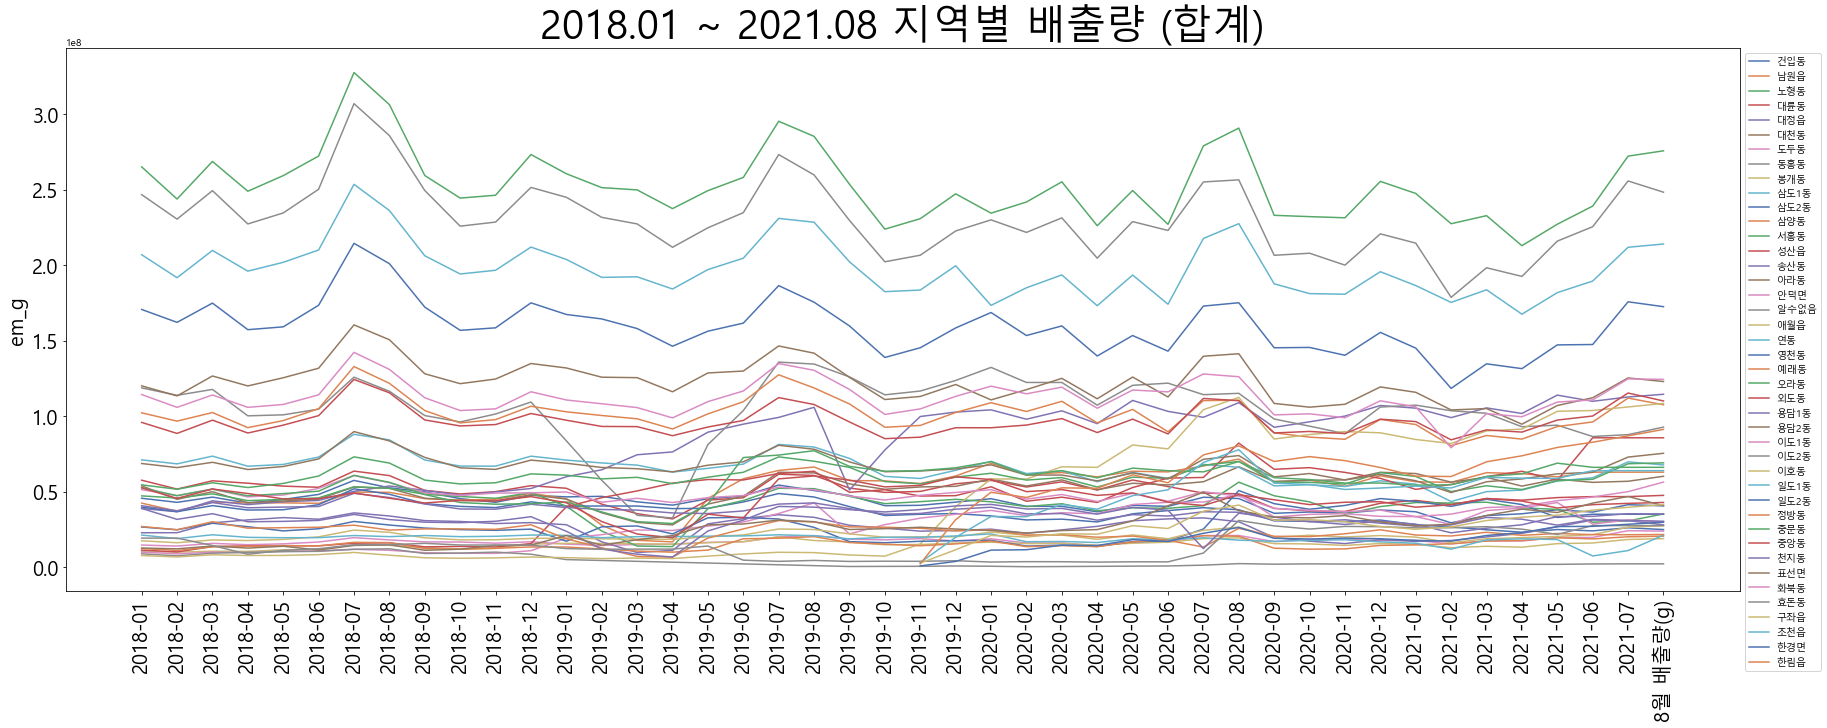

In [30]:
# sns 사용하여 선 그래프 그리기
palette1 = sns.color_palette("deep", 42)  # COLOR 지정

g = sns.lineplot(x = "base_date_ym", y= "em_g", hue = "emd_nm",data = food_ ,palette = palette1)  

g.figure.set_figwidth(30)   # 그래프 크기
g.figure.set_figheight(10)  # 그래프 크기

plt.xticks(rotation = 90, fontsize = 20)  # x축 눈금
plt.yticks(fontsize = 20)  # y축 눈금

g.set_xlabel("", fontsize = 20)  # X축 레이블
g.set_ylabel("em_g", fontsize = 20)  # Y축 레이블
g.set_title("2018.01 ~ 2021.08 지역별 배출량 (합계)", fontsize = 40)  # 제목

plt.legend(bbox_to_anchor = (1,1))  # 범례 위치
plt.show()

### 7,8월 결과 데이터 행정동별 Bar Chart

In [31]:
# 배출량 지역별로 그룹화
em_g78 = food_month_78.groupby('emd_nm')['em_g'].sum()

# 데이터프레임에 저장
FOOD_DF78 = pd.DataFrame()
FOOD_DF78["em_g_sum"] = em_g78
FOOD_DF78.head(3)

,em_g_sum
emd_nm,
건입동,82014347.0
구좌읍,81154321.1
남원읍,125854100.0


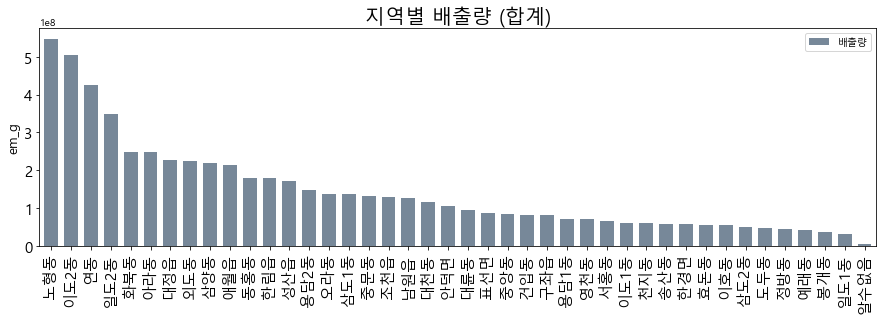

In [32]:
# Bar Chart로 총 배출량 확인
em_g78.sort_values(ascending = False).plot(kind = "bar", figsize = (15,4), fontsize = 15, width=0.7, color="lightslategrey")

plt.xlabel('', fontsize = 13)
plt.xticks(rotation = 90)
plt.ylabel('em_g', fontsize = 13)
plt.legend(["배출량"])
plt.title("지역별 배출량 (합계)", fontsize = 20)
plt.show()